In [2]:
#1. Data Exploration and Preprocessing:

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
# Load the dataset
file_path = 'UberDataset.csv'  # Update the path accordingly
data = pd.read_csv(file_path)
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [52]:
# Convert START_DATE and END_DATE to datetime, allowing for multiple date formats
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

In [54]:
# Drop rows with missing START_DATE or END_DATE as they are crucial for time-based analysis
data_cleaned = data.dropna(subset=['START_DATE', 'END_DATE'])

In [56]:
# Handle missing values in other columns by removing rows with missing CATEGORY, START, or STOP
data_cleaned = data_cleaned.dropna(subset=['CATEGORY', 'START', 'STOP'])

In [58]:

# Retain missing PURPOSE values, as we can still use the data for other analyses

# Check for duplicates and drop them if any
data_cleaned = data_cleaned.drop_duplicates()

# Summary statistics for numerical columns after cleaning
summary_statistics = data_cleaned.describe()
print("\nSummary statistics:")
print(summary_statistics)


Summary statistics:
                          START_DATE                       END_DATE  \
count                            420                            420   
mean   2016-07-01 11:51:50.571428608  2016-07-01 12:11:10.142857216   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-27 14:54:00            2016-03-27 15:10:00   
50%              2016-07-04 17:57:00            2016-07-04 18:19:00   
75%              2016-10-10 17:24:45            2016-10-10 17:39:15   
max              2016-12-12 20:48:00            2016-12-12 20:57:00   
std                              NaN                            NaN   

            MILES  
count  420.000000  
mean     9.083810  
min      0.500000  
25%      2.775000  
50%      5.700000  
75%      9.900000  
max    174.200000  
std     16.386685  


In [60]:
#2. Exploratory Data Analysis (EDA):
%matplotlib inline

In [62]:
# Time-based Analysis
data_cleaned['Hour'] = data_cleaned['START_DATE'].dt.hour
data_cleaned['DayOfWeek'] = data_cleaned['START_DATE'].dt.day_name()
data_cleaned['Month'] = data_cleaned['START_DATE'].dt.month_name()

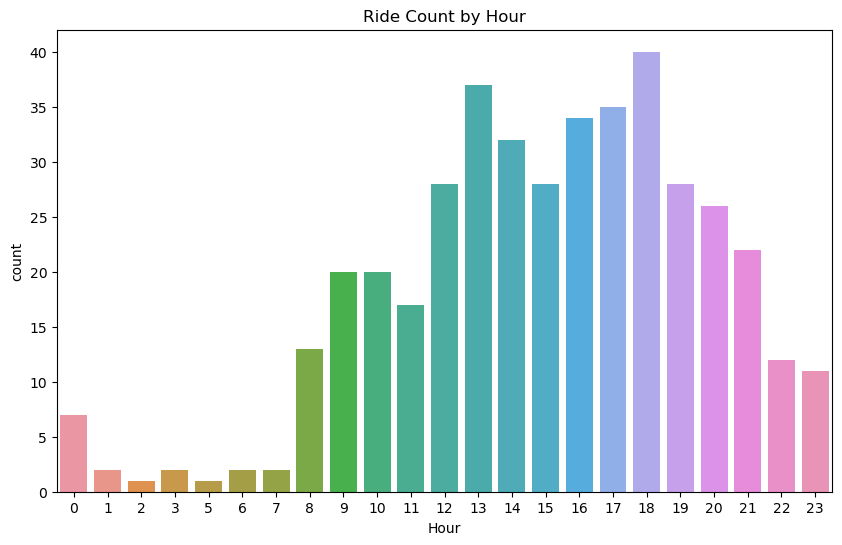

In [64]:
# Plot ride counts by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Hour')
plt.title('Ride Count by Hour')
plt.show()

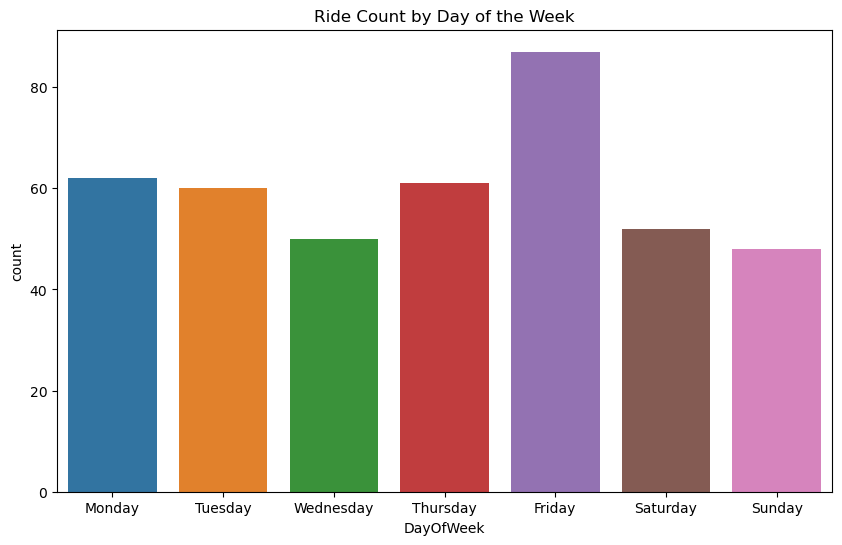

In [65]:
# Plot ride counts by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ride Count by Day of the Week')
plt.show()


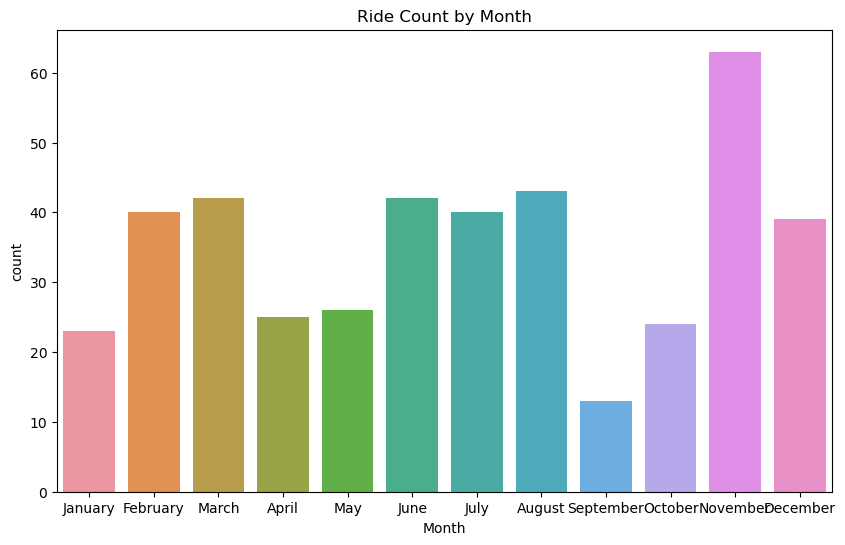

In [67]:
# Plot ride counts by month
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Month')
plt.title('Ride Count by Month')
plt.show()

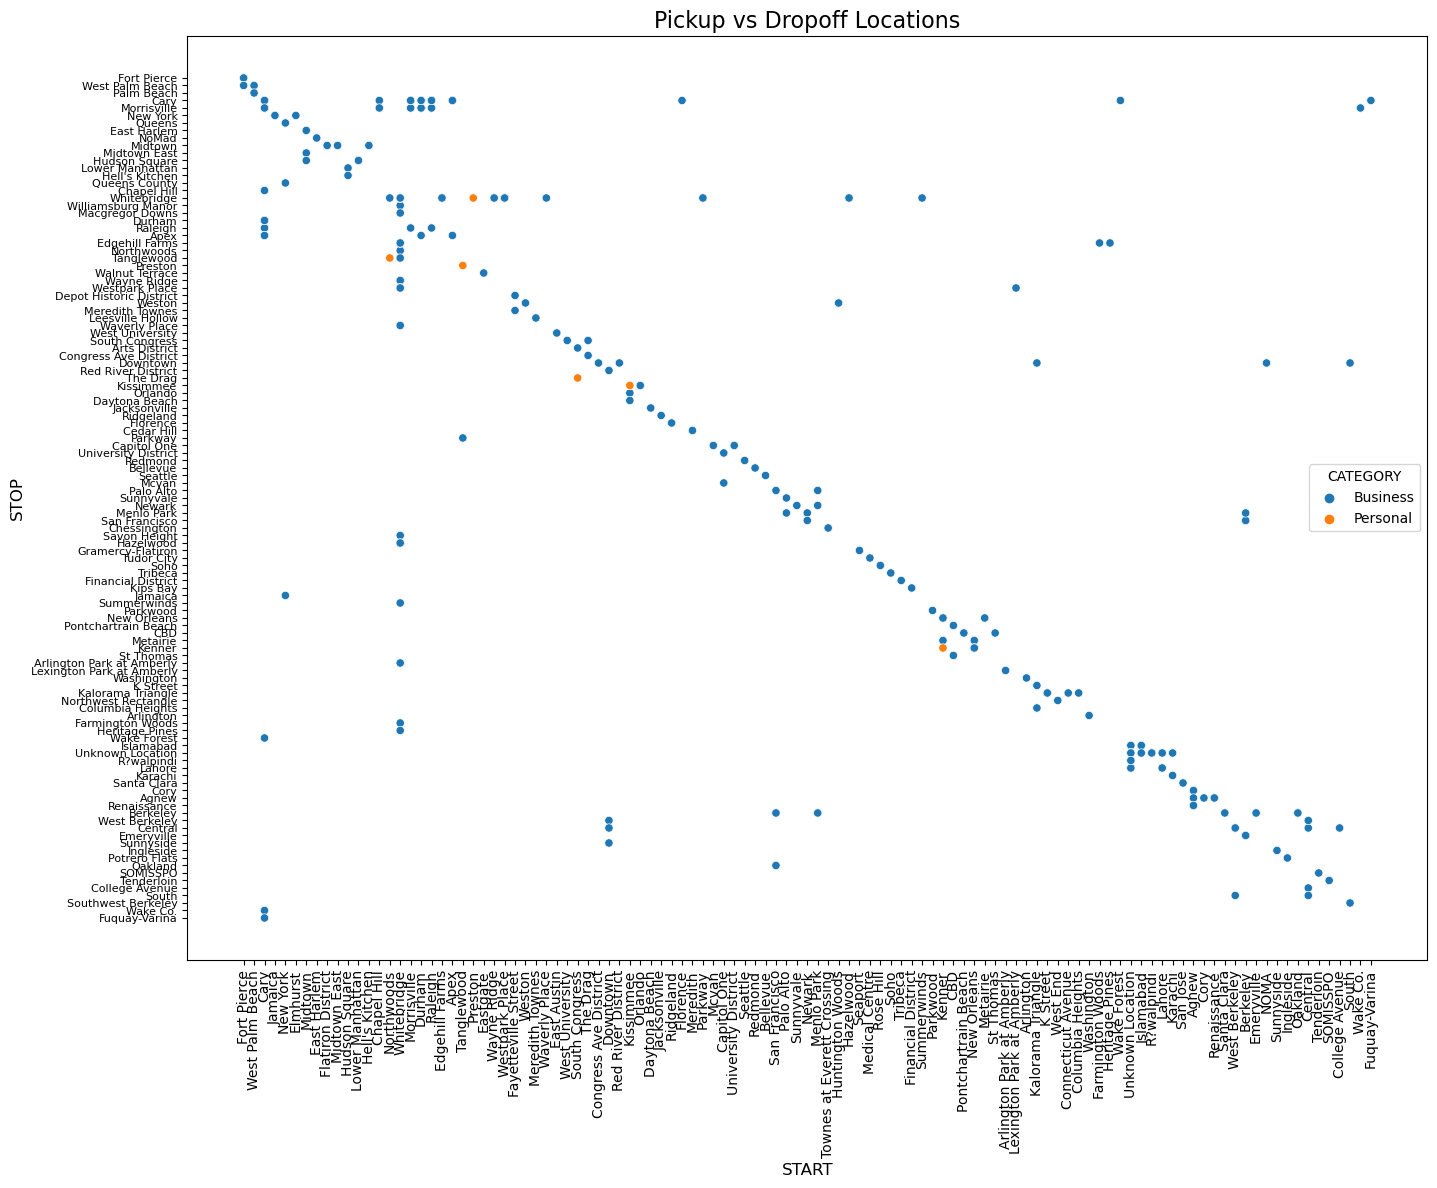

In [69]:
# Location-based Analysis: Visualize pickup and dropoff locations

# Increase figure size to give more space for labels
plt.figure(figsize=(16, 12))

# Create the scatter plot with rotated labels
sns.scatterplot(x=data_cleaned['START'], y=data_cleaned['STOP'], hue=data_cleaned['CATEGORY'])

# Rotate the x-axis labels and adjust y-axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0, fontsize=8)  # Keep labels horizontal but reduce font size for better readability

# Add title and labels
plt.title('Pickup vs Dropoff Locations', fontsize=16)
plt.xlabel('START', fontsize=12)
plt.ylabel('STOP', fontsize=12)

# Show the plot
plt.show()

In [83]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Ride Duration and Distance Analysis
data_cleaned['Ride_Duration'] = (data_cleaned['END_DATE'] - data_cleaned['START_DATE']).dt.total_seconds() / 60  # Convert to minutes
# Replace infinite values with NaN
data_cleaned['Ride_Duration'].replace([np.inf, -np.inf], np.nan, inplace=True)
# Optionally, drop rows with NaN values in Ride_Duration if they exist
data_cleaned = data_cleaned.dropna(subset=['Ride_Duration'])


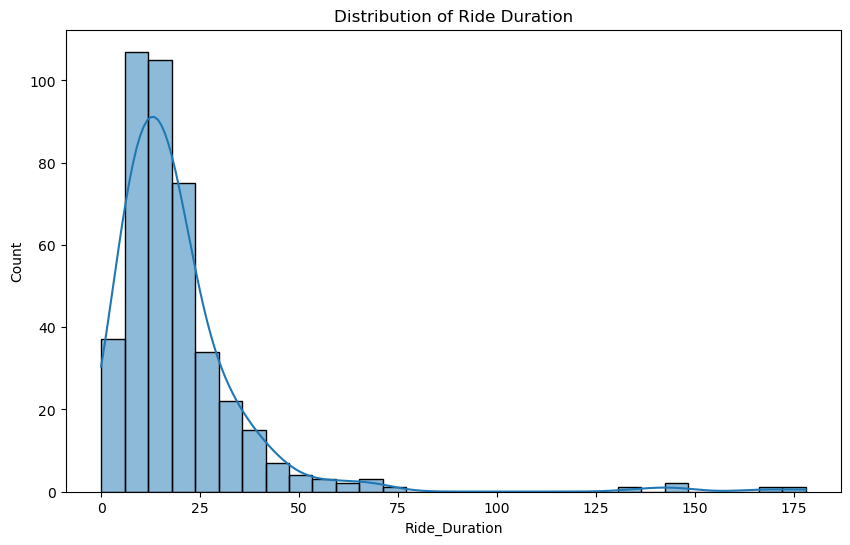

In [85]:
# Plotting the distribution of Ride Duration
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Ride_Duration'], bins=30, kde=True)
plt.title('Distribution of Ride Duration')
plt.show()

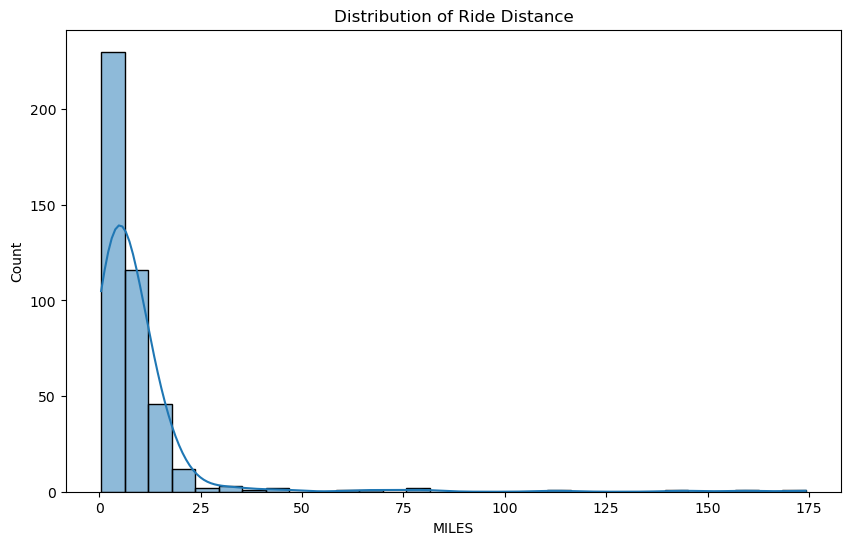

In [87]:
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Replace infinite values with NaN in the MILES column
data_cleaned['MILES'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, drop rows with NaN values in MILES if they exist
data_cleaned = data_cleaned.dropna(subset=['MILES'])

# Plotting the distribution of Ride Distance
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['MILES'], bins=30, kde=True)
plt.title('Distribution of Ride Distance')
plt.show()

In [89]:
# 3. Regression Modeling:

In [91]:
# Prepare the data for modeling
data_cleaned = data_cleaned.dropna(subset=['Ride_Duration'])  # Drop rows with missing Ride_Duration
print(data_cleaned.columns)
data_cleaned

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'Hour', 'DayOfWeek', 'Month', 'Ride_Duration'],
      dtype='object')


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,DayOfWeek,Month,Ride_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,Saturday,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,67.0
...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,13,Monday,December,10.0
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,13,Monday,December,15.0
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,14,Monday,December,13.0
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,17,Monday,December,10.0


In [93]:
# Convert categorical variables to dummy/indicator variables
import pandas as pd
data_cleaned = pd.get_dummies(data_cleaned, columns=['CATEGORY', 'DayOfWeek', 'Month'])
print(data_cleaned.columns)
data_cleaned

Index(['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES', 'PURPOSE', 'Hour',
       'Ride_Duration', 'CATEGORY_Business', 'CATEGORY_Personal',
       'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September'],
      dtype='object')


,START_DATE,END_DATE,START,STOP,MILES,PURPOSE,Hour,Ride_Duration,CATEGORY_Business,CATEGORY_Personal,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,6.0,True,False,...,False,False,True,False,False,False,False,False,False,False
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,NaN,1,12.0,True,False,...,False,False,True,False,False,False,False,False,False,False
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,13.0,True,False,...,False,False,True,False,False,False,False,False,False,False
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,Meeting,17,14.0,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,67.0,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Cary,Cary,3.1,Errand/Supplies,13,10.0,True,False,...,True,False,False,False,False,False,False,False,False,False
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Cary,Apex,4.4,Meal/Entertain,13,15.0,True,False,...,True,False,False,False,False,False,False,False,False,False
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Apex,Cary,4.7,Customer Visit,14,13.0,True,False,...,True,False,False,False,False,False,False,False,False,False
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Cary,Morrisville,3.0,Meal/Entertain,17,10.0,True,False,...,True,False,False,False,False,False,False,False,False,False


In [95]:
# Select features and target variable
features = data_cleaned[['MILES'] + [col for col in data_cleaned.columns if col.startswith('CATEGORY_') or col.startswith('DayOfWeek_') or col.startswith('Month_')]]
target = data_cleaned['Ride_Duration']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [99]:
# Train and evaluate different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(f"{name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions)}")
    print(f"  Mean Squared Error (MSE): {mean_squared_error(y_test, predictions)}")
    print(f"  R-squared: {r2_score(y_test, predictions)}\n")

Linear Regression Performance:
  Mean Absolute Error (MAE): 6.912071130057399
  Mean Squared Error (MSE): 100.1016119585847
  R-squared: 0.7874267992958216

Decision Tree Performance:
  Mean Absolute Error (MAE): 8.511904761904763
  Mean Squared Error (MSE): 227.9345238095238
  R-squared: 0.5159641255605381

Random Forest Performance:
  Mean Absolute Error (MAE): 5.889743480725623
  Mean Squared Error (MSE): 110.87868482502563
  R-squared: 0.7645408853867696

